In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

wine = load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logistic_model = LogisticRegression(max_iter=10000)
tree_model = DecisionTreeClassifier(random_state=1)
knn_model = KNeighborsClassifier()
svm_model = SVC(random_state=1)

logistic_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

logistic_acc = logistic_model.score(X_test, y_test)
tree_acc = tree_model.score(X_test, y_test)
knn_acc = knn_model.score(X_test, y_test)
svm_acc = svm_model.score(X_test, y_test)

print(f"Logistic Regression Accuracy: {logistic_acc:.4f}")
print(f"Decision Tree Accuracy: {tree_acc:.4f}")
print(f"k-NN Accuracy: {knn_acc:.4f}")
print(f"SVM Accuracy: {svm_acc:.4f}")

Logistic Regression Accuracy: 1.0000
Decision Tree Accuracy: 0.9444
k-NN Accuracy: 0.7407
SVM Accuracy: 0.7593


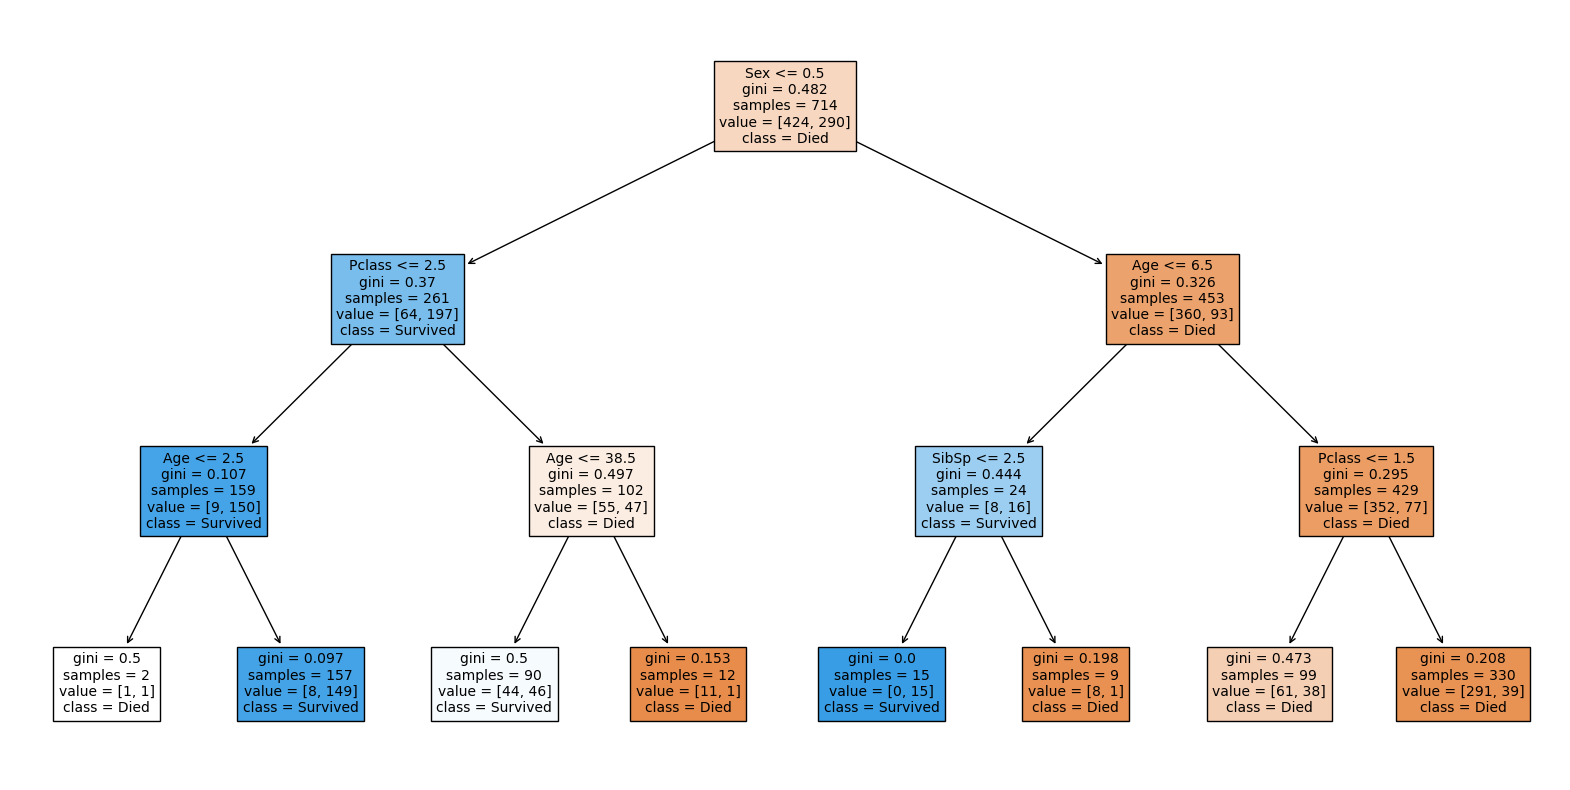

In [2]:
x

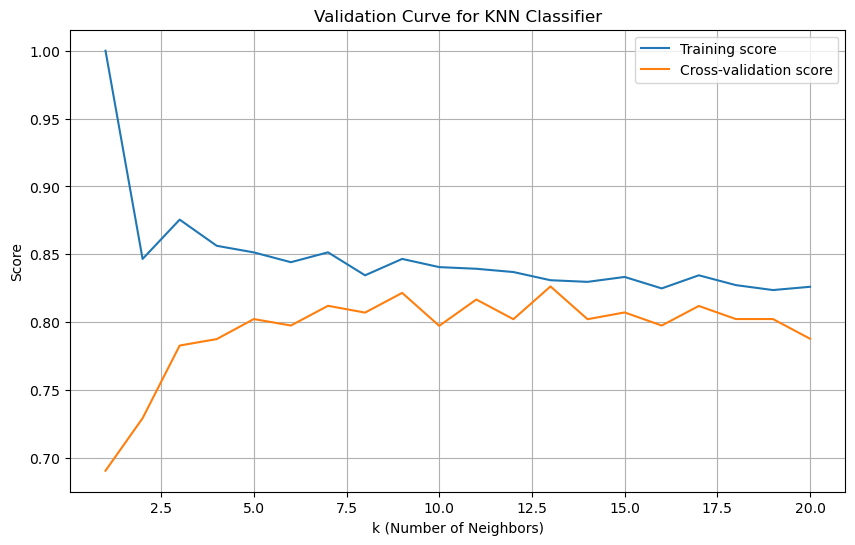

Best k value: 13
Test accuracy for best k value: 0.8888888888888888


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
hd = pd.read_csv('heart_disease.csv')

# Set num values to 0 and 1 (if it is > 0)
hd['num'] = np.where(hd['num'] > 0, 1, 0)

# Make X, y using all features
X = hd.values[:, :-1]
y = hd.values[:, -1].astype(np.int32) 

# Split the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline with StandardScaler and KNeighborsClassifier
pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())

# Define the range of k values for validation curve
k_values = np.arange(1, 21)

# Plot validation curve with k values 1 ~ 20
train_scores, test_scores = validation_curve(
    estimator=pipeline, X=X_train, y=y_train,
    param_name='kneighborsclassifier__n_neighbors',
    param_range=k_values, cv=5)

plt.figure(figsize=(10, 6))
plt.plot(k_values, np.mean(train_scores, axis=1), label='Training score')
plt.plot(k_values, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Score')
plt.title('Validation Curve for KNN Classifier')
plt.legend()
plt.grid(True)
plt.show()

# Find the best k value
best_k = k_values[np.argmax(np.mean(test_scores, axis=1))]
print("Best k value:", best_k)

# Train the model with the best k value
pipeline.set_params(kneighborsclassifier__n_neighbors=best_k)
pipeline.fit(X_train, y_train)

# Test accuracy for the best k value
test_accuracy = pipeline.score(X_test, y_test)
print("Test accuracy for best k value:", test_accuracy)


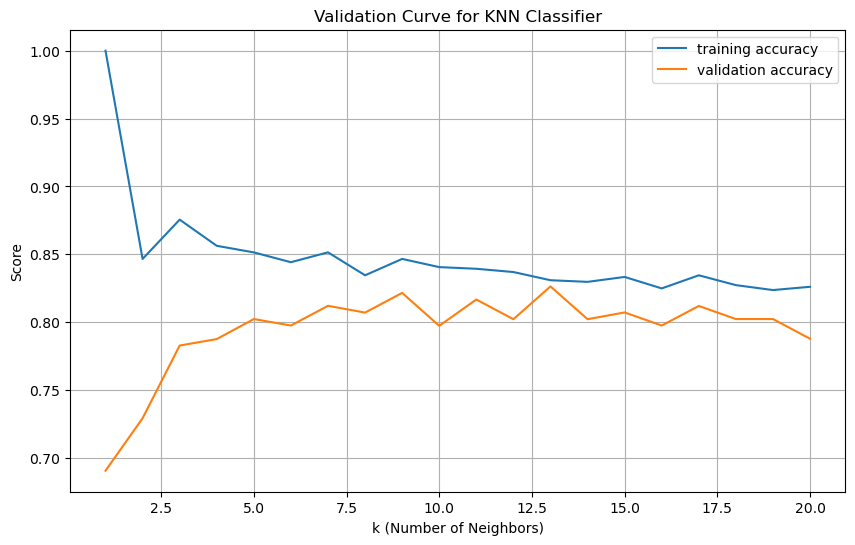

Best k value: 13
Validation accuracy for best k value: 0.8263646922183507
Test accuracy for best k value: 0.8888888888888888


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
hd = pd.read_csv('heart_disease.csv')

# Set num values to 0 and 1 (if it is > 0)
hd['num'] = np.where(hd['num'] > 0, 1, 0)

# Make X, y using all features
X = hd.values[:, :-1]
y = hd.values[:, -1].astype(np.int32) 

# Split the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline with StandardScaler and KNeighborsClassifier
pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())

# Define the range of k values for validation curve
k_values = np.arange(1, 21)

train_scores, test_scores = validation_curve(
    estimator=pipeline, X=X_train, y=y_train,
    param_name='kneighborsclassifier__n_neighbors',
    param_range=k_values, cv=5)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot validation curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_mean, label='training accuracy')
plt.plot(k_values, test_mean, label='validation accuracy')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Score')
plt.title('Validation Curve for KNN Classifier')
plt.legend()
plt.grid(True)
plt.show()

# Find the best k value and corresponding validation accuracy
best_k_index = np.argmax(np.mean(valid_scores, axis=1))
best_k = k_values[best_k_index]
best_score = np.mean(valid_scores, axis=1)[best_k_index]
print("Best k value:", best_k)
print("Validation accuracy for best k value:", best_score)

# Train the model with the best k value
pipeline.set_params(kneighborsclassifier__n_neighbors=best_k)
pipeline.fit(X_train, y_train)

# Test accuracy for the best k value
test_accuracy = pipeline.score(X_test, y_test)
print("Test accuracy for best k value:", test_accuracy)


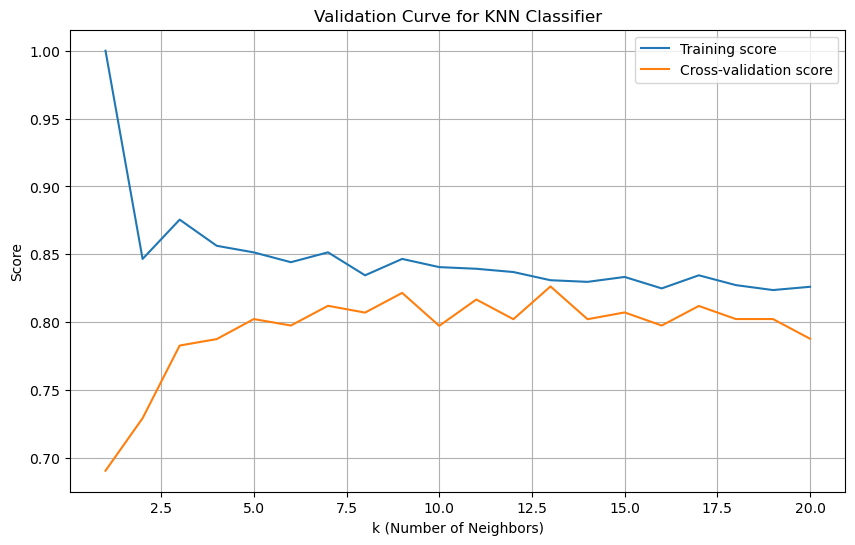

Best k value: 13
Test accuracy for best k value: 0.8888888888888888


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
hd = pd.read_csv('heart_disease.csv')

# Set num values to 0 and 1 (if it is > 0)
hd['num'] = np.where(hd['num'] > 0, 1, 0)

# Make X, y using all features
X = hd.iloc[:, :-1].values
y = hd.iloc[:, -1].values.astype(np.int32)

# Split the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline with StandardScaler and KNeighborsClassifier
pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())

# Define the range of k values for validation curve
k_values = np.arange(1, 21)

# Calculate validation curve
train_scores, valid_scores = validation_curve(
    estimator=pipeline, X=X_train, y=y_train,
    param_name='kneighborsclassifier__n_neighbors',
    param_range=k_values, cv=5)

# Plot validation curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, np.mean(train_scores, axis=1), label='Training score')
plt.plot(k_values, np.mean(valid_scores, axis=1), label='Cross-validation score')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Score')
plt.title('Validation Curve for KNN Classifier')
plt.legend()
plt.grid(True)
plt.show()

# Find the best k value
best_k = k_values[np.argmax(np.mean(valid_scores, axis=1))]
print("Best k value:", best_k)

# Train the model with the best k value
pipeline.set_params(kneighborsclassifier__n_neighbors=best_k)
pipeline.fit(X_train, y_train)

# Test accuracy for the best k value
test_accuracy = pipeline.score(X_test, y_test)
print("Test accuracy for best k value:", test_accuracy)


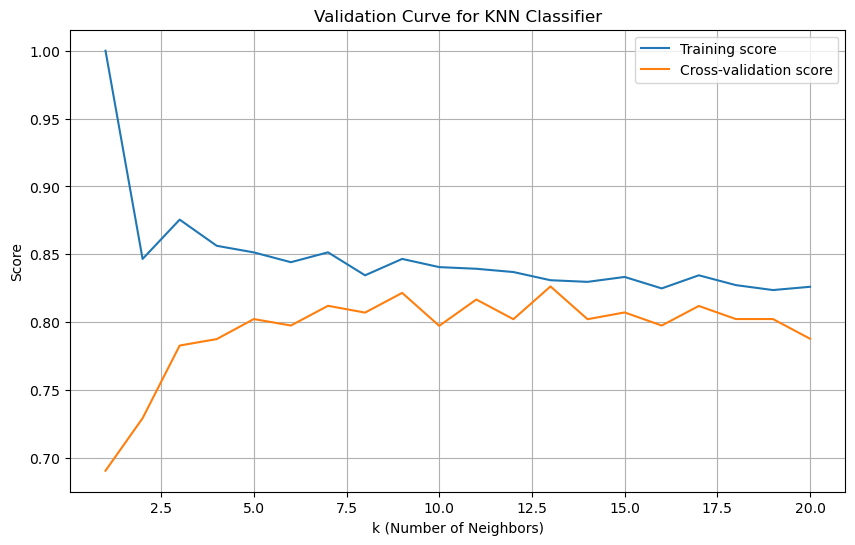

Best k value: 13
Test accuracy for best k value: 0.8888888888888888


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, validation_curve, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

hd = pd.read_csv('heart_disease.csv')

hd['num'] = np.where(hd['num'] > 0, 1, 0)

X = hd.iloc[:, :-1].values
y = hd.iloc[:, -1].values.astype(np.int32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())

k_values = np.arange(1, 21)
param_grid = {'kneighborsclassifier__n_neighbors': k_values}

gs = GridSearchCV(pipeline, param_grid, cv=5)
gs.fit(X_train, y_train)

train_scores, test_scores = validation_curve(
    estimator=gs.best_estimator_, X=X_train, y=y_train,
    param_name='kneighborsclassifier__n_neighbors',
    param_range=k_values, cv=5)

plt.figure(figsize=(10, 6))
plt.plot(k_values, np.mean(train_scores, axis=1), label='Training score')
plt.plot(k_values, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Score')
plt.title('Validation Curve for KNN Classifier')
plt.legend()
plt.grid(True)
plt.show()

best_k = gs.best_params_['kneighborsclassifier__n_neighbors']
print("Best k value:", best_k)

test_accuracy = gs.score(X_test, y_test)
print("Test accuracy for best k value:", test_accuracy)
